In [1]:
import torch
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

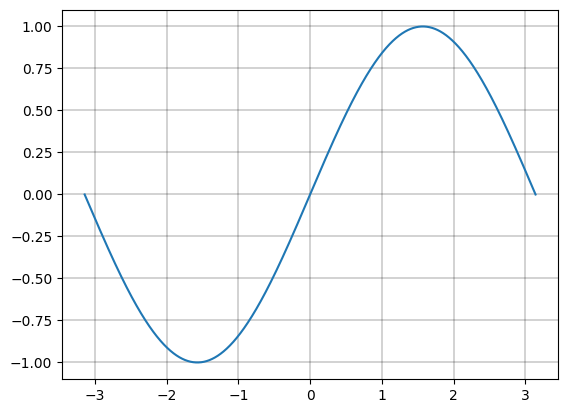

In [3]:
xs = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
ys = torch.sin(xs)

plt.plot(list(xs), list(ys))
plt.grid(visible=True, which='major', axis='both', color='black', linestyle='-', linewidth=0.25)
plt.show()

In [4]:
learning_rate = 0.00000001

In [5]:
a = torch.randn((), dtype = dtype, requires_grad = True)
b = torch.randn((), dtype = dtype, requires_grad = True)
c = torch.randn((), dtype = dtype, requires_grad = True)
d = torch.randn((), dtype = dtype, requires_grad = True)

In [6]:
while True:

    y_pred = a + b*xs + c*xs**2 + d*xs**3
    
    loss = (y_pred - ys).pow(2).sum()
    if loss.item() < 20.:
        break

    loss.backward()

    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        a.grad = None
        b.grad = None
        c.grad = None
        d.gard = None


In [7]:
print(f'f(x) = {a} + {b}x + {c}x^2 + {d}x^3')

f(x) = -0.062043286859989166 + 0.7709581851959229x + 0.010703491047024727x^2 + -0.08129844069480896x^3


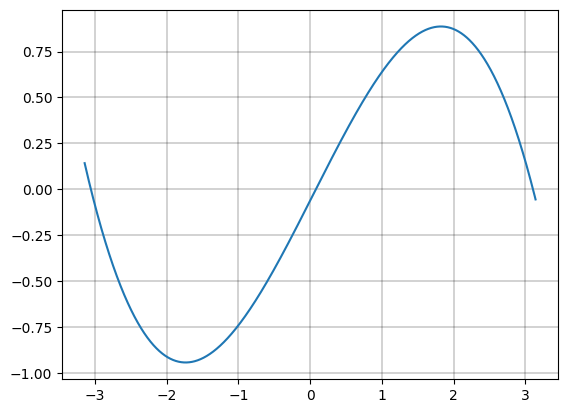

In [8]:
ys_infered = xs.clone()
ys_infered.apply_(lambda x: a + b*x + c*x**2 + d*x**3)

plt.plot(list(xs), list(ys_infered))
plt.grid(visible=True, which='major', axis='both', color='black', linestyle='-', linewidth=0.25)
plt.show()

In [9]:
loss

tensor(19.9999, grad_fn=<SumBackward0>)